In [12]:
from bs4 import BeautifulSoup
from lxml import html
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
%matplotlib inline
import selenium.webdriver as webdriver
from selenium.webdriver.common.keys import Keys
import time
import requests
import plotly.express as px

In [8]:
!pip3 install --user plotly

You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install selenium

     |████████████████████████████████| 911kB 1.9MB/s eta 0:00:01


In [11]:
!pip install plotly

  Using cached https://files.pythonhosted.org/packages/8e/ce/6ea5683c47b682bffad39ad41d10913141b560b1b875a90dbc6abe3f4fa9/plotly-4.4.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/44/ef/beae4b4ef80902f22e3af073397f079c96969c69b2c7d52a57ea9ae61c9d/retrying-1.3.3.tar.gz
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=a4a36e4d82a78ed6f2b8b41847bdae9f43ccca15199e62bc450d4feab92f2b9f
  Stored in directory: /Users/malika/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [13]:
url = "http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&root=1&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217417&type=222"
table = BeautifulSoup(requests.get(url).text).findAll('table')[8]
titles = ["digital" if len(title.string.split("№")) == 1 else title.string.split("№")[1] for title in table.findAll('a')]
values = [value.string for value in table.findAll('b')]
data = []
for i in range(len(values)):
    if i // len(titles) == 0 or i // len(titles) > 10:
        if i % len(titles) == 0: 
            data.append([])
        data[-1].append(values[i])
df = pd.DataFrame(data)

url = "http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&root=1&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217417&type=454"
values = [value.string.strip() for value in BeautifulSoup(requests.get(url).text).findAll("td", {"class": "tdData"})][5:]
attendance = []
for i in range(len(values)):
    if (i % 5 == 4):
        attendance.append(float(values[i].split("%")[0])) 
attendance.append(100.0)
attendance_df = pd.DataFrame(attendance).transpose()
df = df.append(attendance_df, ignore_index=True)
print(df)

       0       1       2       3       4       5       6      7       8   \
0  105510  147015  101715  122638  255414  173058  147651  84723  106551   
1    6206   10177    4480    6139    9031    7395    6380   4156    5501   
2   19818   26213   17177   22156   46362   26233   28405  20635   24219   
3    5783    8799    4429    7840   10970    8505    6854   4604    4945   
4   25.46   24.92   21.95   22.95    21.2   19.93   23.23  30.82   25.05   

      9   ...      21      22      23      24      25     26      27      28  \
0  93291  ...  137381  136998  126000  138569  127787  89318  175819  162685   
1   4104  ...    8526    5463    4252    5608    4978   4111    7750    6424   
2  19296  ...   27667   24976   23750   25665   21077  13463   30515   32701   
3   4351  ...    7067    5849    4641    7684    6477   3852    8468    8669   
4  23.24  ...   26.11   21.74   21.97   22.04   21.12  19.33   21.59   20.64   

      29   30  
0  67326  535  
1   4644  194  
2  12315   82 

In [14]:
def getTIC(ticNumber):
    urlTicNumber = 27820001217419 + ticNumber
    url = "http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&type=222&vibid=" + str(urlTicNumber)
    table = BeautifulSoup(requests.get(url).text).findAll('table')[8]
    titles = [title.string.split("№")[1] for title in table.findAll('td', text = re.compile('УИК №'))]
    values = [value.string for value in table.findAll('b')]
    data = []
    for i in range(len(values)):
        if i // len(titles) == 0 or i // len(titles) > 10:
            if i % len(titles) == 0: 
                data.append([])
            data[-1].append(values[i])
    cleanData = {
        'tik': titles,
        'uik': titles,
        'all': data[0], 
        'amosov': data[1],
        'beglov': data[2],
        'tihonova': data[3]
    }
    localDf = pd.DataFrame(cleanData).astype(int)
    localDf['tik'] = ticNumber+1
    return localDf

In [15]:
df = pd.DataFrame({
        'tik': [],
        'uik': [],
        'all': [], 
        'amosov': [],
        'beglov': [],
        'tihonova': []
    }).astype(float)
for i in range(30):
    df = df.append(getTIC(i))
df  
    

,tik,uik,all,amosov,beglov,tihonova
0,1.0,1.0,1803.0,110.0,345.0,120.0
1,1.0,2.0,1466.0,53.0,326.0,46.0
2,1.0,3.0,2092.0,155.0,332.0,96.0
3,1.0,4.0,1056.0,67.0,171.0,71.0
4,1.0,5.0,1827.0,137.0,266.0,82.0
...,...,...,...,...,...,...
45,30.0,2350.0,284.0,21.0,184.0,14.0
46,30.0,2351.0,132.0,7.0,91.0,13.0
47,30.0,2352.0,320.0,20.0,193.0,23.0
48,30.0,2355.0,485.0,23.0,290.0,32.0


In [16]:
def plot(x,y,label):
    x=np.array(x).reshape(-1,1)
    y=np.array(y).reshape(-1,1)
    l=LinearRegression().fit(x,y)
    c=l.coef_[0][0]
    xmin=min(x)
    xmax=max(x)
    ls=np.linspace(xmin,xmax)
    plt.plot(ls,ls*c,color='red')
    plt.scatter(x,y,linewidth=1)
    plt.legend(['МНК','Голоса за '+label])
    print('MSE =',mean_squared_error(y,x*c))
    print('R2 score = ',r2_score(y,x*c))
    plt.show()
    print()

MSE = 1266.383906573136
R2 score =  0.230245217943443


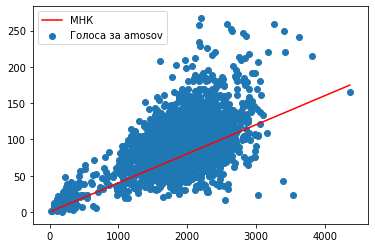


MSE = 37158.99666640875
R2 score =  -0.10831618982542035


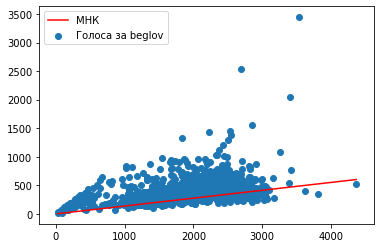


MSE = 1103.4794256204677
R2 score =  0.4469261776244977


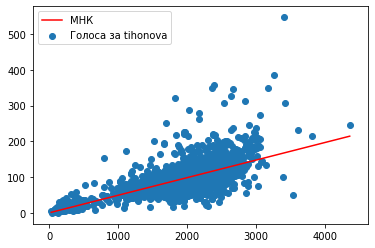

In [17]:
plot(df['all'], df['amosov'], "amosov")
plot(df['all'], df['beglov'], "beglov")
plot(df['all'], df['tihonova'], "tihonova")

In [18]:
url = "http://www.st-petersburg.vybory.izbirkom.ru/region/st-petersburg/?action=ik&vrn=4784001269007"
driver = webdriver.Chrome('/chromedriver')
driver.get(url)


WebDriverException: Message: 'chromedriver 2' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
tiks = [driver.find_elements_by_class_name("jstree-open")[1].get_attribute("id")]
tiks.extend([i.get_attribute("id") for i in driver.find_elements_by_class_name("jstree-closed")])
uiks = []
len(tiks)
for i in tiks:
    driver.get("http://www.st-petersburg.vybory.izbirkom.ru/region/st-petersburg/?action=ik&vrn="+i)
    time.sleep(2)
    elements = driver.find_elements_by_class_name("jstree-leaf")
    print(len(elements))
    uiks.extend([i.get_attribute("id") for i in elements])
    

In [ ]:
addresses = {}
for i in uiks:
    url = "http://www.st-petersburg.vybory.izbirkom.ru/region/st-petersburg/?action=ik&vrn=" + i
    soup = BeautifulSoup(requests.get(url).text)
    address = soup.find("span", {"id": "address_ik"}).findChild().string
    uikId = int(soup.findAll("h2")[1].string.split("№")[1].split()[0])
    addresses[uikId] = address
print(addresses)



In [ ]:
coordinates = {}
print()
for i in addresses.keys():
    resp = requests.get('https://geocode-maps.yandex.ru/1.x?geocode=' + addresses[i] + '&apikey=7431bc8c-b001-46a5-b77d-980fb6fae0bf&format=json')
    coordinates[i] = [float(i) for i in resp.json()["response"]["GeoObjectCollection"]["featureMember"][0]["GeoObject"]["Point"]["pos"].split()]

In [ ]:
cooArr = {
        'lat': np.zeros(df.shape[0]),
        'lon': np.zeros(df.shape[0])
}
df1 = df.copy()
df1['lat'] = pd.Series(np.zeros(df.shape[0]))
df1['lon'] = pd.Series(np.zeros(df.shape[0]))

for k,v in coordinates.items():
    index = df1.where(df1["uik"] == k).dropna().index
    df1['lat'][index[0]] = v[1]
    df1['lon'][index[0]] = v[0]
df1["amosov_percent"] = df1["amosov"] / df1["all"]
df1["tihonova_percent"] = df1["tihonova"] / df1["all"]
df1["beglov_percent"] = df1["beglov"] / df1["all"]

In [ ]:
fig = px.scatter_mapbox(df1, lat="lat", lon="lon", hover_name="uik", 
                        hover_data=["amosov_percent"], color="amosov_percent", size="all",
                        color_continuous_scale=px.colors.cyclical.IceFire, zoom=7, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
# , "beglov", "tihonova"

In [ ]:
fig = px.scatter_mapbox(df1, lat="lat", lon="lon", hover_name="uik", 
                        hover_data=["beglov_percent"], color="beglov_percent", size="all",
                        color_continuous_scale=px.colors.cyclical.IceFire, zoom=7, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
fig = px.scatter_mapbox(df1, lat="lat", lon="lon", hover_name="uik", 
                        hover_data=["tihonova_percent"], color="tihonova_percent", size="all",
                        color_continuous_scale=px.colors.cyclical.IceFire, zoom=7, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()